In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-dataset/marketdata_sample.csv
/kaggle/input/news-dataset/news_sample.csv


In [2]:
#utilities for data processing and algebra
import numpy as np 
import pandas as pd 

#for specialized container datatypes
import collections

#for plotting and data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for feature preprocessing
import re

#sklearn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

#extension to reload modules before executing user code
%reload_ext autoreload
%autoreload 2

#importing os to analyse and organize the directory structure
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/news-dataset/marketdata_sample.csv
/kaggle/input/news-dataset/news_sample.csv


In [3]:
from fastai import *
from fastai.text import *

In [4]:
market_train_df = pd.read_csv('../input/news-dataset/marketdata_sample.csv')

In [5]:
market_train_df.head()

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1.0,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994


In [6]:
market_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      100 non-null    object 
 1   assetCode                 100 non-null    object 
 2   assetName                 100 non-null    object 
 3   universe                  100 non-null    float64
 4   volume                    100 non-null    float64
 5   close                     100 non-null    float64
 6   open                      100 non-null    float64
 7   returnsClosePrevRaw1      100 non-null    float64
 8   returnsOpenPrevRaw1       100 non-null    float64
 9   returnsClosePrevMktres1   0 non-null      float64
 10  returnsOpenPrevMktres1    0 non-null      float64
 11  returnsClosePrevRaw10     100 non-null    float64
 12  returnsOpenPrevRaw10      100 non-null    float64
 13  returnsClosePrevMktres10  0 non-null      float64
 14  returnsOpen

In [7]:
market_train_df['time']= pd.to_datetime(market_train_df['time'])

In [8]:
market_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   time                      100 non-null    datetime64[ns, UTC]
 1   assetCode                 100 non-null    object             
 2   assetName                 100 non-null    object             
 3   universe                  100 non-null    float64            
 4   volume                    100 non-null    float64            
 5   close                     100 non-null    float64            
 6   open                      100 non-null    float64            
 7   returnsClosePrevRaw1      100 non-null    float64            
 8   returnsOpenPrevRaw1       100 non-null    float64            
 9   returnsClosePrevMktres1   0 non-null      float64            
 10  returnsOpenPrevMktres1    0 non-null      float64            
 11  returnsClosePrevRaw1

In [9]:
pip install chart_studio

     |████████████████████████████████| 64 kB 419 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [10]:
import plotly.offline as py
import plotly.graph_objects as go
data = []
for asset in np.random.choice(market_train_df['assetName'].unique(), 10):
    asset_df = market_train_df[(market_train_df['assetName'] == asset)]

    data.append(go.Scatter(
        x = asset_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
        y = asset_df['close'].values,
        name = asset
    ))
layout = go.Layout(dict(title = "Closing prices of 10 random assets",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [11]:
data = []
market_train_df['close'] = market_train_df['close'] / 20
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    price_df = market_train_df.groupby('time')['close'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = price_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
        y = price_df['close'].values,
        name = f'{i} quantile'
    ))
layout = go.Layout(dict(title = "Trends of closing prices by quantiles",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [12]:
market_train_df['price_diff'] = market_train_df['close'] - market_train_df['open']
grouped = market_train_df.groupby('time').agg({'price_diff': ['std', 'min']}).reset_index()

In [13]:
print(f"Average standard deviation of price change within a day in {grouped['price_diff']['std'].mean():.4f}.")

Average standard deviation of price change within a day in 21.7860.


In [14]:
g = grouped.sort_values(('price_diff', 'std'), ascending=False)[:10]
g['min_text'] = 'Maximum price drop: ' + (-1 * g['price_diff']['min']).astype(str)
trace = go.Scatter(
    x = g['time'].dt.strftime(date_format='%Y-%m-%d').values,
    y = g['price_diff']['std'].values,
    mode='markers',
    marker=dict(
        size = g['price_diff']['std'].values,
        color = g['price_diff']['std'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = g['min_text'].values
    #text = f"Maximum price drop: {g['price_diff']['min'].values}"
    #g['time'].dt.strftime(date_format='%Y-%m-%d').values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Top 10 months by standard deviation of price change within a day',
    hovermode= 'closest',
    yaxis=dict(
        title= 'price_diff',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [15]:
market_train_df['price_diff'] = market_train_df['close'] - market_train_df['open']
grouped = market_train_df.groupby('time').agg({'price_diff': ['std', 'min']}).reset_index()

In [16]:
print(f"Average standard deviation of price change within a day in {grouped['price_diff']['std'].mean():.4f}.")

Average standard deviation of price change within a day in 21.7860.


In [17]:
market_train_df.sort_values('price_diff')[:10]

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,price_diff
13,2007-02-01 22:00:00+00:00,ACL.N,Alcon Inc,1.0,255300.0,5.9105,117.77,0.003821,-0.000679,NaN,NaN,-0.003120,-0.002794,NaN,NaN,0.084964,-111.8595
43,2007-02-01 22:00:00+00:00,AGN.N,Allergan plc,1.0,1436500.0,5.8905,116.76,0.009425,0.036577,NaN,NaN,0.001615,-0.003669,NaN,NaN,-0.048026,-110.8695
75,2007-02-01 22:00:00+00:00,AMG.N,Affiliated Managers Group Inc,0.0,481100.0,5.6710,114.00,0.018133,0.035328,NaN,NaN,0.052426,0.050111,NaN,NaN,-0.101874,-108.3290
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1.0,23747329.0,4.2370,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,-81.9930
88,2007-02-01 22:00:00+00:00,ANF.N,Abercrombie & Fitch Co,1.0,2435800.0,4.0755,79.62,0.024767,0.022736,NaN,NaN,0.025541,0.004542,NaN,NaN,-0.005778,-75.5445
60,2007-02-01 22:00:00+00:00,ALB.N,Albemarle Corp,0.0,327400.0,3.9625,78.50,0.016286,-0.001907,NaN,NaN,0.088449,0.081863,NaN,NaN,0.044098,-74.5375
94,2007-02-01 22:00:00+00:00,APD.N,Air Products and Chemicals Inc,1.0,1256100.0,3.7355,74.62,0.000670,0.018286,NaN,NaN,0.057167,0.050246,NaN,NaN,0.012615,-70.8845
92,2007-02-01 22:00:00+00:00,APA.N,Apache Corp,1.0,6339700.0,3.5785,72.69,-0.019186,0.014232,NaN,NaN,0.090175,0.098700,NaN,NaN,-0.001529,-69.1115
76,2007-02-01 22:00:00+00:00,AMGN.O,Amgen Inc,1.0,13781108.0,3.4745,70.19,-0.012505,-0.002983,NaN,NaN,-0.056996,-0.049689,NaN,NaN,-0.025217,-66.7155
23,2007-02-01 22:00:00+00:00,ADS.N,Alliance Data Systems Corp,1.0,2963800.0,3.3100,68.00,-0.025467,0.018727,NaN,NaN,0.036643,0.062666,NaN,NaN,-0.042951,-64.6900


In [18]:
market_train_df['close_to_open'] =  np.abs(market_train_df['close'] / market_train_df['open'])

In [19]:
market_train_df.head()

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,price_diff,close_to_open
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,1.6095,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,-30.5605,0.050031
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,0.5560,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,-10.5240,0.050181
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,1.8755,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,-36.1145,0.049368
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1.0,23747329.0,4.2370,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,-81.9930,0.049136
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1.0,1208600.0,0.9010,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,-17.1090,0.050028


In [20]:
print(f"In {(market_train_df['close_to_open'] >= 1.2).sum()} lines price increased by 20% or more.")
print(f"In {(market_train_df['close_to_open'] <= 0.8).sum()} lines price decreased by 20% or more.")

In 0 lines price increased by 20% or more.
In 100 lines price decreased by 20% or more.


In [21]:
print(f"In {(market_train_df['close_to_open'] >= 2).sum()} lines price increased by 100% or more.")
print(f"In {(market_train_df['close_to_open'] <= 0.5).sum()} lines price decreased by 100% or more.")

In 0 lines price increased by 100% or more.
In 100 lines price decreased by 100% or more.


In [22]:
market_train_df['assetName_mean_open'] = market_train_df.groupby('assetName')['open'].transform('mean')
market_train_df['assetName_mean_close'] = market_train_df.groupby('assetName')['close'].transform('mean')

# if open price is too far from mean open price for this company, replace it. Otherwise replace close price.
for i, row in market_train_df.loc[market_train_df['close_to_open'] >= 2].iterrows():
    if np.abs(row['assetName_mean_open'] - row['open']) > np.abs(row['assetName_mean_close'] - row['close']):
        market_train_df.iloc[i,5] = row['assetName_mean_open']
    else:
        market_train_df.iloc[i,4] = row['assetName_mean_close']
        
for i, row in market_train_df.loc[market_train_df['close_to_open'] <= 0.5].iterrows():
    if np.abs(row['assetName_mean_open'] - row['open']) > np.abs(row['assetName_mean_close'] - row['close']):
        market_train_df.iloc[i,5] = row['assetName_mean_open']
    else:
        market_train_df.iloc[i,4] = row['assetName_mean_close']

In [23]:
market_train_df['price_diff'] = market_train_df['close'] - market_train_df['open']
grouped = market_train_df.groupby(['time']).agg({'price_diff': ['std', 'min']}).reset_index()
g = grouped.sort_values(('price_diff', 'std'), ascending=False)[:10]
g['min_text'] = 'Maximum price drop: ' + (-1 * np.round(g['price_diff']['min'], 2)).astype(str)
trace = go.Scatter(
    x = g['time'].dt.strftime(date_format='%Y-%m-%d').values,
    y = g['price_diff']['std'].values,
    mode='markers',
    marker=dict(
        size = g['price_diff']['std'].values * 5,
        color = g['price_diff']['std'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = g['min_text'].values
    #text = f"Maximum price drop: {g['price_diff']['min'].values}"
    #g['time'].dt.strftime(date_format='%Y-%m-%d').values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Top 10 months by standard deviation of price change within a day',
    hovermode= 'closest',
    yaxis=dict(
        title= 'price_diff',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [24]:
data = []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    price_df = market_train_df.groupby('time')['returnsOpenNextMktres10'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = price_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
        y = price_df['returnsOpenNextMktres10'].values,
        name = f'{i} quantile'
    ))
layout = go.Layout(dict(title = "Trends of returnsOpenNextMktres10 by quantiles",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"),)
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [25]:
data = []
market_train_df = market_train_df.loc[market_train_df['time'] >= '2010-01-01 22:00:00+0000']

price_df = market_train_df.groupby('time')['returnsOpenNextMktres10'].mean().reset_index()

data.append(go.Scatter(
    x = price_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
    y = price_df['returnsOpenNextMktres10'].values,
    name = f'{i} quantile'
))
layout = go.Layout(dict(title = "Treand of returnsOpenNextMktres10 mean",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"),)
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [26]:
data = []
for col in ['returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10']:
    df = market_train_df.groupby('time')[col].mean().reset_index()
    data.append(go.Scatter(
        x = df['time'].dt.strftime(date_format='%Y-%m-%d').values,
        y = df[col].values,
        name = col
    ))
    
layout = go.Layout(dict(title = "Treand of mean values",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"),)
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [27]:
news_train_df = pd.read_csv('../input/news-dataset/news_sample.csv')

In [28]:
news_train_df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...","{'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...",...,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'IQ', 'RO', 'US', 'ID', 'RET', 'RTRS', 'ENR',...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,0,0,0


In [29]:
print(f'{news_train_df.shape[0]} samples and {news_train_df.shape[1]} features in the training news dataset.')

100 samples and 35 features in the training news dataset.


In [30]:
text = ' '.join(news_train_df['headline'].str.lower().values[-1000000:])
wordcloud = WordCloud(max_font_size=None, stopwords=stop, background_color='white',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words in headline')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

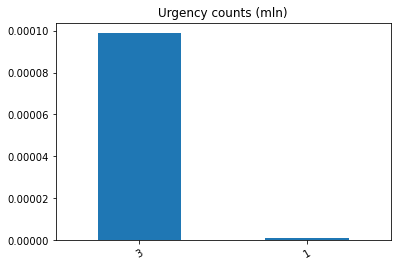

In [31]:
(news_train_df['urgency'].value_counts() / 1000000).plot(kind = 'bar');
plt.xticks(rotation=30);
plt.title('Urgency counts (mln)');

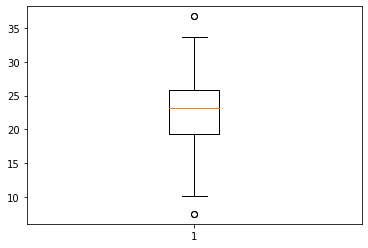

In [32]:
news_train_df['sentence_word_count'] =  news_train_df['wordCount'] / news_train_df['sentenceCount']
plt.boxplot(news_train_df['sentence_word_count'][news_train_df['sentence_word_count'] < 40]);

In [33]:
news_train_df['provider'].value_counts().head(10)

RTRS    87
RNS      6
BSW      5
PRN      2
Name: provider, dtype: int64

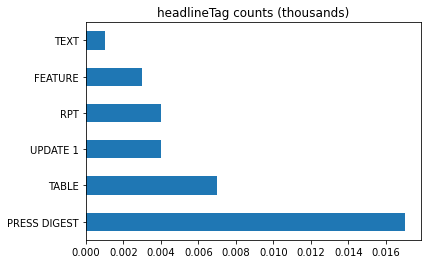

In [34]:
(news_train_df['headlineTag'].value_counts() / 1000)[:10].plot(kind = 'barh');
plt.title('headlineTag counts (thousands)');

In [35]:
for i, j in zip([-1, 0, 1], ['negative', 'neutral', 'positive']):
    df_sentiment = news_train_df.loc[news_train_df['sentimentClass'] == i, 'assetName']
    print(f'Top mentioned companies for {j} sentiment are:')
    print(df_sentiment.value_counts().head(5))
    print('')

Top mentioned companies for negative sentiment are:
Banco Santander SA           5
Travelers Companies Inc      3
Kookmin Bank                 3
Korea Electric Power Corp    2
Sanofi SA                    2
Name: assetName, dtype: int64

Top mentioned companies for neutral sentiment are:
Taiwan Semiconductor Manufacturing Co Ltd    3
Microsoft Corp                               2
Corus Group Ltd                              2
HSBC Holdings PLC                            2
China Mobile Ltd                             2
Name: assetName, dtype: int64

Top mentioned companies for positive sentiment are:
Korea Electric Power Corp       5
LG Display Co Ltd               2
Corus Group Ltd                 2
Kookmin Bank                    2
Twenty-First Century Fox Inc    2
Name: assetName, dtype: int64



In [ ]:
def data_prep(market_train_df,news_train_df):
    market_train_df['time'] = market_train_df.time.dt.date
    market_train_df['returnsOpenPrevRaw1_to_volume'] = market_train_df['returnsOpenPrevRaw1'] / market_train_df['volume']
    market_train_df['close_to_open'] = market_train_df['close'] / market_train_df['open']
    market_train_df['volume_to_mean'] = market_train_df['volume'] / market_train_df['volume'].mean()
    news_train_df['sentence_word_count'] =  news_train_df['wordCount'] / news_train_df['sentenceCount']
    news_train_df['time']= pd.to_datetime(news_train_df['time'])
    news_train_df['time'] = news_train_df.time.dt.hour
    news_train_df['sourceTimestamp']= pd.to_datetime(news_train_df['sourceTimestamp'])
    news_train_df['sourceTimestamp']= news_train_df.sourceTimestamp.dt.hour
    news_train_df['firstCreated']= pd.to_datetime(news_train_df['firstCreated'])
    news_train_df['firstCreated'] = news_train_df.firstCreated.dt.date
    news_train_df['assetCodesLen'] = news_train_df['assetCodes'].map(lambda x: len(eval(x)))
    news_train_df['assetCodes'] = news_train_df['assetCodes'].map(lambda x: list(eval(x))[0])
    news_train_df['headlineLen'] = news_train_df['headline'].apply(lambda x: len(x))
    news_train_df['assetCodesLen'] = news_train_df['assetCodes'].apply(lambda x: len(x))
    news_train_df['asset_sentiment_count'] = news_train_df.groupby(['assetName', 'sentimentClass'])['time'].transform('count')
    news_train_df['asset_sentence_mean'] = news_train_df.groupby(['assetName', 'sentenceCount'])['time'].transform('mean')
    lbl = {k: v for v, k in enumerate(news_train_df['headlineTag'].unique())}
    news_train_df['headlineTagT'] = news_train_df['headlineTag'].map(lbl)
    kcol = ['firstCreated', 'assetCodes']
    news_train_df = news_train_df.groupby(kcol, as_index=False).mean()

    market_train_df = pd.merge(market_train_df, news_train_df, how='left', left_on=['time', 'assetCode'], 
                            right_on=['firstCreated', 'assetCodes'])

    lbl = {k: v for v, k in enumerate(market_train_df['assetCode'].unique())}
    market_train_df['assetCodeT'] = market_train_df['assetCode'].map(lbl)
    
    market_train_df = market_train_df.dropna(axis=0)
    
    return market_train_df

market_train_df.drop(['price_diff', 'assetName_mean_open', 'assetName_mean_close'], axis=1, inplace=True)
market_train_df = data_prep(market_train_df, news_train_df)
print(market_train_df.shape)
up = market_train_df.returnsOpenNextMktres10 >= 0

fcol = [c for c in market_train_df.columns if c not in ['assetCode', 'assetCodes', 'assetCodesLen', 'assetName', 'assetCodeT',
                                             'firstCreated', 'headline', 'headlineTag', 'marketCommentary', 'provider',
                                             'returnsOpenNextMktres10', 'sourceId', 'subjects', 'time', 'time_x', 'universe','sourceTimestamp']]

X = market_train_df[fcol].values
up = up.values
r = market_train_df.returnsOpenNextMktres10.values

# Scaling of X values
mins = np.min(X, axis=0)
maxs = np.max(X, axis=0)
rng = maxs - mins
X = 1 - ((maxs - X) / rng)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, up_train, up_test, r_train, r_test = train_test_split(X, up, r, test_size=0.1, random_state=99)

In [ ]:
params = {'learning_rate': 0.01, 'max_depth': 12, 'boosting': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'is_training_metric': True, 'seed': 42}
model = lgb.train(params, train_set=lgb.Dataset(X_train, label=up_train), num_boost_round=2000,
                  valid_sets=[lgb.Dataset(X_train, label=up_train), lgb.Dataset(X_test, label=up_test)],
                  verbose_eval=100, early_stopping_rounds=100)